### Build, Train, make Predictions, and Evaluate ML Models against the [Pima Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Instantiate Classification Models
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees in the forest


<hr />

In [3]:
# Install and import kagglehub
#%pip install kagglehub -q
import kagglehub

path_to_dataset = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
df = pd.read_csv(path_to_dataset + "/diabetes.csv")

print()
print(df.info())
print(f"Shape: {df.shape}")
print()
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Shape: (768, 9)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2

In [4]:
print(f"\nSummary Statistics:")
df.describe().T



Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



Correlation Values:

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose            

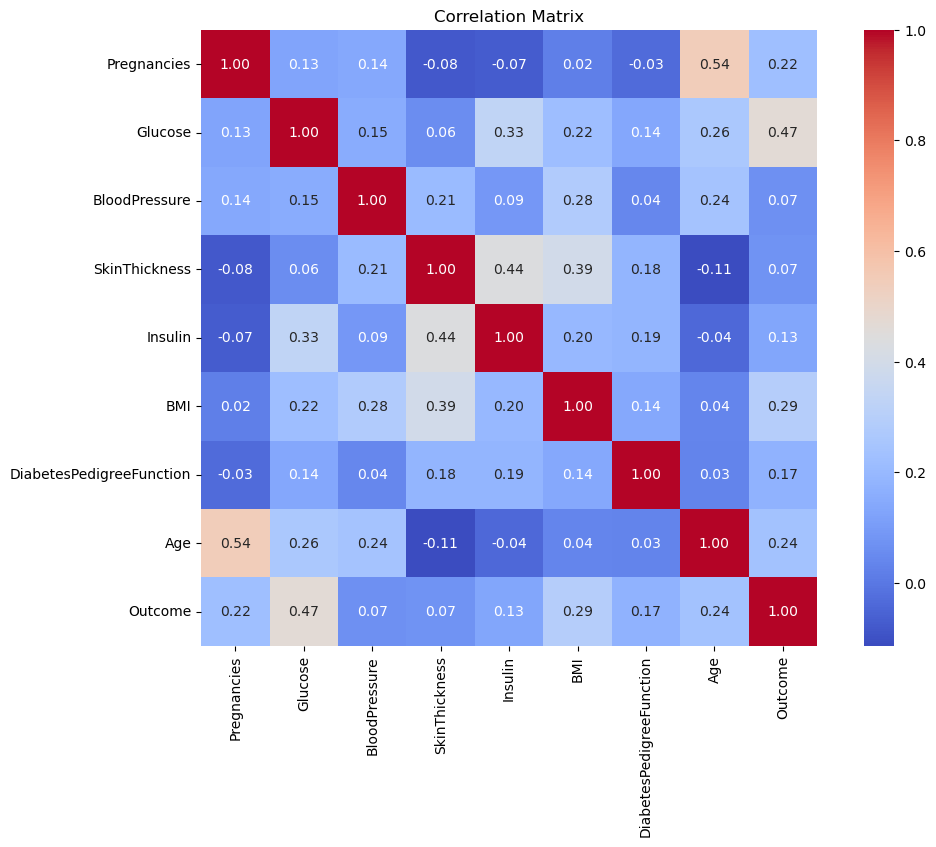

In [5]:
# Display Correlation Values
print("\nCorrelation Values:\n")
print(df.corr())

# Display Correlation Matrix (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


<hr />

No missing values found.

Columns that have 0 values (excluding ['Pregnancies', 'Outcome']): ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Columns with 0 values:
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
Outcome: 500


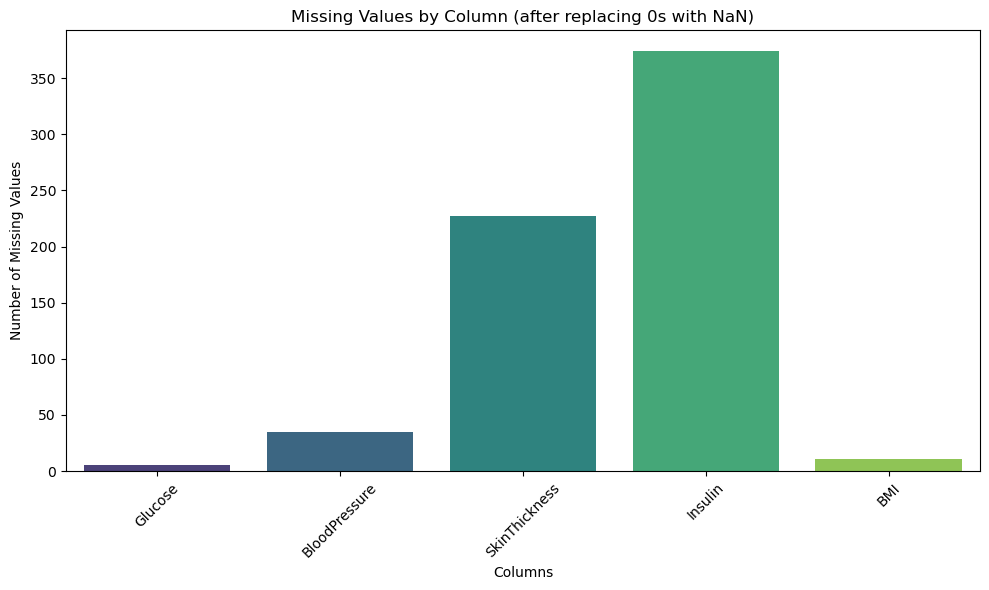


Filling NaN values with median of each column...

Columns that have 0 values (excluding ['Pregnancies', 'Outcome']): []

Columns with 0 values:
Pregnancies: 111
Outcome: 500


In [6]:
# Cleanse the Data

# Check for Missing Values
df_has_missing_data = df.isnull().values.any()
if df_has_missing_data:
    print(f"\nMissing values:\n{df.isnull().sum()}")
else:
    print("No missing values found.")

# Check all for cols that have 0 in cells
def find_cols_with_zero_for_value(df):
    """
    Function to find columns that have 0 values (excluding 'Pregnancies' and 'Outcome')
    and print the count of 0 values in each column.
    
    Parameters:
        - df: pandas DataFrame
    
    Returns:
        - List of columns that have 0 values (excluding 'Pregnancies' and 'Outcome')
    """
    skip_cols = ["Pregnancies", "Outcome"]
    cols_with_zeros = [col for col in df.columns if col not in skip_cols and (df[col] == 0).any()]
    print(f"\nColumns that have 0 values (excluding {skip_cols}): {cols_with_zeros}")

    print("\nColumns with 0 values:")
    for col in df.columns:
        num_zeros = (df[col] == 0).sum()
        if num_zeros > 0:
            print(f"{col}: {num_zeros}")
    
    return cols_with_zeros


# Replace 0 in Glucose, BloodPressure, SkinThickness, Insulin, BMI with NaN
cols_with_zeros = find_cols_with_zero_for_value(df)
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)


# Display Bar Plot of Missing of cols with 0 values
# Count missing values for columns with zeros
missing_counts = df[cols_with_zeros].isnull().sum()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.title('Missing Values by Column (after replacing 0s with NaN)')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Replace cols with NaN with imputed values (median of the column)
print("\nFilling NaN values with median of each column...")
df.fillna(df.median(), inplace=True)
missing_count = find_cols_with_zero_for_value(df)


In [7]:
# Prepare Features and Target Variables
# Drop Outcome column to create feature set X and target variable y
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nX_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (614, 8), y_train shape: (614,)
X_test shape: (154, 8), y_test shape: (154,)


<hr />

In [8]:
def check_for_overfitting(model, accuracy, X_train, y_train):
    """
    Check for overfitting by comparing training and test accuracy.
    If training accuracy is significantly higher than test accuracy, it may indicate overfitting.
    
    Parameters:
        - model: Trained model to evaluate.
        - accuracy: Test accuracy of the model.
        - X_train: Training feature set.
        - y_train: Training target variable.
    """
    print(f" Checking for overfitting in model: {model.__class__.__name__}")

    print("=" * 40)
    print(f"Training Accuracy: {model.score(X_train, y_train):.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Difference (Training - Test): {model.score(X_train, y_train) - accuracy:.4f}")
    print()

    if model.score(X_train, y_train) - accuracy > 0.1:
        print("⚠️  OVERFITTING DETECTED: Training accuracy is significantly higher than test accuracy")
    elif model.score(X_train, y_train) - accuracy > 0.05:
        print("⚠️  POSSIBLE OVERFITTING: Training accuracy is moderately higher than test accuracy")
    else:
        print("✅ NO SIGNIFICANT OVERFITTING: Training and test accuracies are reasonably close")


<hr />

In [9]:
# Train and evaluate Logistic Regression model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"\nTraining Score: {lr.score(X_train, y_train)}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_lr))



Training Score: 0.7687296416938111
Logistic Regression Accuracy: 0.7727

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [10]:
# Determine if Logistic Regression is overfitting
check_for_overfitting(lr, accuracy_lr, X_train, y_train)


 Checking for overfitting in model: LogisticRegression
Training Accuracy: 0.7687
Test Accuracy: 0.7727
Difference (Training - Test): -0.0040

✅ NO SIGNIFICANT OVERFITTING: Training and test accuracies are reasonably close


<hr />

In [11]:
# Train and evaluate with Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nTraining Score: {rf.score(X_train, y_train)}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Training Score: 1.0
Random Forest Accuracy: 0.7662

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [12]:
# Determine if Random Forest is overfitting
check_for_overfitting(rf, accuracy_rf, X_train, y_train)


 Checking for overfitting in model: RandomForestClassifier
Training Accuracy: 1.0000
Test Accuracy: 0.7662
Difference (Training - Test): 0.2338

⚠️  OVERFITTING DETECTED: Training accuracy is significantly higher than test accuracy


<hr />

In [13]:
def make_prediction(model, scaler, new_sample):
    """
    Make a prediction on a new sample using the provided model and scaler.

    Parameters:
        - model: Trained machine learning model.
        - scaler: Fitted scaler for feature scaling.
        - new_sample: New sample data as a 2D numpy array.
    """
    new_sample_scaled = scaler.transform(new_sample)
    prediction = model.predict(new_sample_scaled)
    print(f"Prediction for new sample {new_sample[0]}: {'Diabetic' if prediction[0] == 1 else 'Not Diabetic'}")


<hr />

In [14]:
# Reload the dataset and preprocessg
df = pd.read_csv(path_to_dataset + "/diabetes.csv")

# Cleanse the Data
# Replace 0 in Glucose, BloodPressure, SkinThickness, Insulin, BMI with NaN
cols_with_zeros = find_cols_with_zero_for_value(df)
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)

# Replace cols with NaN with imputed values (mean of the column)
for col in cols_with_zeros:
    df[col].replace(np.nan, df[col].mean(), inplace=True)

# Prepare Features and Target Variables
X = df.iloc[:, :-1].to_numpy()  # Features (all columns except the last)
y = df.iloc[:, -1].to_numpy()   # Target variable (last column)

# Split features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=df.columns[:-1]).describe().T



Columns that have 0 values (excluding ['Pregnancies', 'Outcome']): ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Columns with 0 values:
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
Outcome: 500


,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,-2.748435e-17,1.000815,-1.126063,-0.835435,-0.254181,0.617702,3.814603
Glucose,614.0,5.062906e-16,1.000815,-2.569188,-0.750318,-0.121981,0.638638,2.523650
BloodPressure,614.0,-8.679268e-16,1.000815,-4.053128,-0.720387,-0.020079,0.612710,4.112089
SkinThickness,614.0,6.046557e-15,1.000815,-2.519843,-0.482723,-0.012667,0.394370,7.892101
Insulin,614.0,-6.130456e-15,1.000815,-1.637603,-0.414719,-0.012279,-0.012279,7.915817
BMI,614.0,-4.814101e-15,1.000815,-2.064725,-0.719681,-0.024628,0.593168,4.932365
DiabetesPedigreeFunction,614.0,1.583243e-15,1.000815,-1.166818,-0.686239,-0.292765,0.420595,5.867657
Age,614.0,-3.471707e-17,1.000815,-1.048981,-0.799114,-0.382668,0.616800,3.948363


 Checking for overfitting in model: XGBClassifier
Training Accuracy: 1.0000
Test Accuracy: 0.7987
Difference (Training - Test): 0.2013

⚠️  OVERFITTING DETECTED: Training accuracy is significantly higher than test accuracy
[[89 18]
 [13 34]]


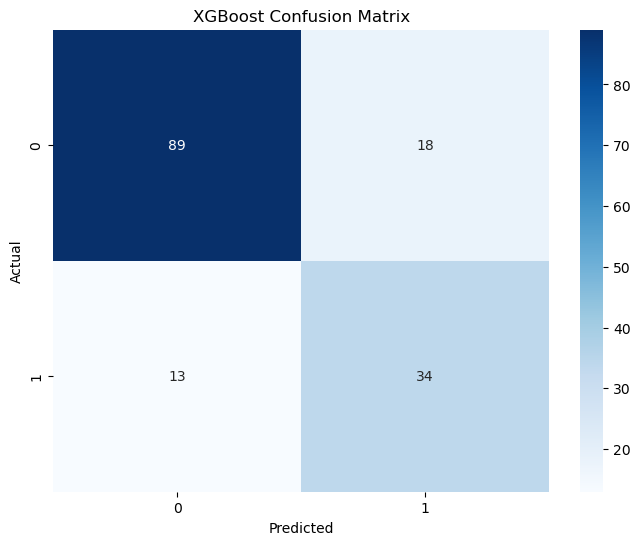

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       107
           1       0.65      0.72      0.69        47

    accuracy                           0.80       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.81      0.80      0.80       154

Accuracy: 0.7987012987012987


In [15]:
# XGBoost Classifier
#%pip install xgboost -q
from xgboost import XGBClassifier

# Instantiate XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, verbose=0, eval_metric='logloss')

# Train and evaluate with XGBoost Classifier
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Determine if XGBoost is overfitting
check_for_overfitting(xgb, accuracy, X_train_scaled, y_train)

print(confusion_matrix(y_test, y_pred))
# Display confusion matrix heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy}")


In [16]:
# Make a prediction on a new sample (Diabetic patient)
make_prediction(xgb, scaler, np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]]))

# Make a prediction on a new sample (Non-Diabetic patient)
make_prediction(xgb, scaler, np.array([[1, 85, 66, 29, 0, 26.6, 0.351, 31]]))


Prediction for new sample [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]: Diabetic
Prediction for new sample [ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]: Not Diabetic


<hr />

In [17]:
# Reload the dataset and preprocessg
df = pd.read_csv(path_to_dataset + "/diabetes.csv")

# Prepare Features and Target Variables
X = df.drop(columns=["Outcome"], axis=1)
y = df["Outcome"]

# Scale the Data
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

# Update the Features with scaled data
X = scaled_data

# Split features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print(f"\nX_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")




X_train shape: (614, 8), y_train shape: (614,)
X_test shape: (154, 8), y_test shape: (154,)


In [18]:
# SVMC Classifier
from sklearn import svm

# Instantiate SVMC Classifier
svmc = svm.SVC(kernel='linear', C=1.0)

# Train and evaluate with SVMC Classifier
svmc.fit(X_train, y_train)
y_pred = svmc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Determine if SVMC is overfitting
check_for_overfitting(svmc, accuracy, X_train, y_train)

print()
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy}")


 Checking for overfitting in model: SVC
Training Accuracy: 0.7801
Test Accuracy: 0.7792
Difference (Training - Test): 0.0009

✅ NO SIGNIFICANT OVERFITTING: Training and test accuracies are reasonably close

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154

Accuracy: 0.7792207792207793


In [19]:
# Make a prediction on a new sample (Diabetic patient)
make_prediction(svmc, scaler, np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]]))

# Make a prediction on a new sample (Non-Diabetic patient)
make_prediction(svmc, scaler, np.array([[1, 85, 66, 29, 0, 26.6, 0.351, 31]]))


Prediction for new sample [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]: Diabetic
Prediction for new sample [ 1.    85.    66.    29.     0.    26.6    0.351 31.   ]: Not Diabetic


<hr />

In [ ]:
# Save the Linear Regression model using joblib
#%pip install joblib -q
import joblib

joblib.dump(lr, 'pima_diabetes_lr_predicter.joblib')


['pima_diabetes_lr_predicter.joblib']

In [26]:
# Load the model from the file
lr_loaded = joblib.load('pima_diabetes_lr_predicter.joblib')

# Make a prediction on a new sample (Diabetic patient) using the loaded model
make_prediction(lr_loaded, scaler, np.array([[8, 155, 85, 40, 210, 35.2, 0.745, 45]]))

# Make a prediction on a new sample (Non-Diabetic patient) using the loaded model
make_prediction(lr_loaded, scaler, np.array([[2, 90, 70, 30, 0, 25.0, 0.500, 22]]))


Prediction for new sample [  8.    155.     85.     40.    210.     35.2     0.745  45.   ]: Not Diabetic
Prediction for new sample [ 2.  90.  70.  30.   0.  25.   0.5 22. ]: Not Diabetic
